# EMAIL SPAM- HAM CLASSIFIER

In [1]:
#!pip install nltk

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('spam.csv',encoding='Windows-1252')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1763,ham,Joy's father is John. Then John is the NAME of...,NaN,NaN,NaN
5273,ham,Its too late:)but its k.wish you the same.,NaN,NaN,NaN
2257,ham,Here got lots of hair dresser fr china.,NaN,NaN,NaN
623,ham,"sorry, no, have got few things to do. may be i...",NaN,NaN,NaN
4161,ham,How's it going? Got any exciting karaoke type ...,NaN,NaN,NaN


## 1. DATA CLEANING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
2175,ham,I'm at work. Please call
2375,ham,Thanx 4 2day! U r a goodmate I THINK UR RITE S...
2609,ham,"Awesome, text me when you're restocked"
2670,ham,Yes. They replied my mail. I'm going to the ma...
1769,ham,Ha... Both of us doing e same thing. But i got...


In [6]:
#RENAMING THE COLUMN NAMES
df.rename(columns={'v1':'target','v2':'mails'},inplace=True)
df.sample(5)

,target,mails
2879,spam,Last Chance! Claim ur å£150 worth of discount ...
1769,ham,Ha... Both of us doing e same thing. But i got...
777,ham,\Hi its Kate it was lovely to see you tonight ...
1168,ham,Ok . . now i am in bus. . If i come soon i wil...
5005,ham,ILL B DOWN SOON


In [7]:
# SETTING 0-HAM 1-SPAM MAILS USING LABELENCODER
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.sample(5)

,target,mails
292,0,Oops. 4 got that bit.
3783,0,Dear got train and seat mine lower seat
3528,1,Xmas & New Years Eve tickets are now on sale f...
1266,0,\Hey sorry I didntgive ya a a bellearlier hunny
4121,0,Doc prescribed me morphine cause the other pai...


In [8]:
#Check missing values
df.isnull().sum()

target    0
mails     0
dtype: int64

In [9]:
#Check duplicate values (rows)
df.duplicated().sum()

403

In [10]:
# Remove duplicated values by keeping first occurence only
df=df.drop_duplicates(keep='first')


In [11]:
df.duplicated().sum() # all duplicate rows removed

0

## 2. Exploratory Data Analysis(EDA)

In [12]:
df['target'].value_counts()
# 0- ham 1- spam

0    4516
1     653
Name: target, dtype: int64

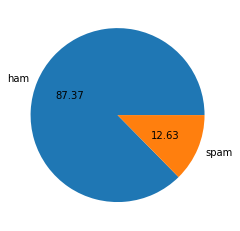

In [13]:
# to visualize nicely target column
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [14]:
import nltk

In [15]:
# downloading dependencies
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['char_count']=df['mails'].apply(len)

In [17]:
df['words_count']=df['mails'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
df['sent_count']=df['mails'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [19]:
df.head(5)

,target,mails,char_count,words_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
df.describe()

,target,char_count,words_count,sent_count
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [21]:
# HAM
df[df['target']==0][['char_count','words_count','sent_count']].describe()

,char_count,words_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [22]:
# SPAM
df[df['target']==1][['char_count','words_count','sent_count']].describe()

,char_count,words_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [23]:
# plot histogram for both category
import seaborn as sns

<AxesSubplot:xlabel='char_count', ylabel='Count'>

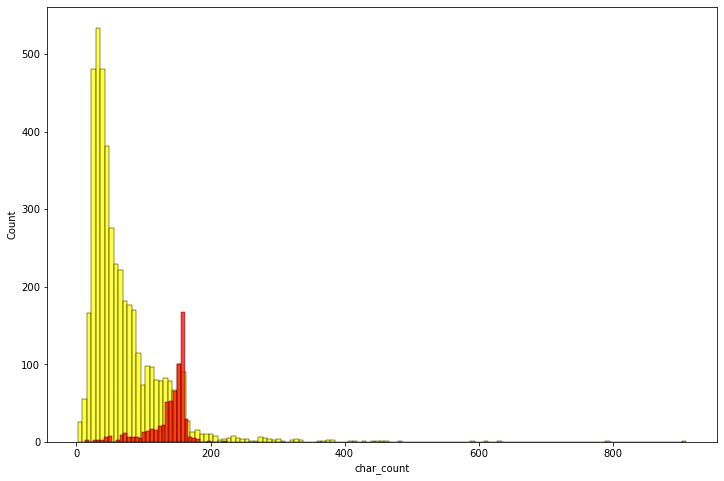

In [24]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['char_count'],color='yellow')
sns.histplot(df[df['target']==1]['char_count'],color='red')

<AxesSubplot:xlabel='words_count', ylabel='Count'>

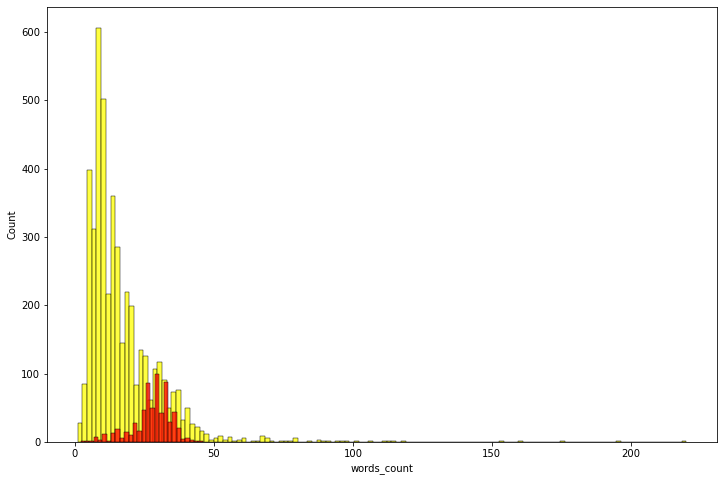

In [25]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['words_count'],color='yellow')
sns.histplot(df[df['target']==1]['words_count'],color='red')

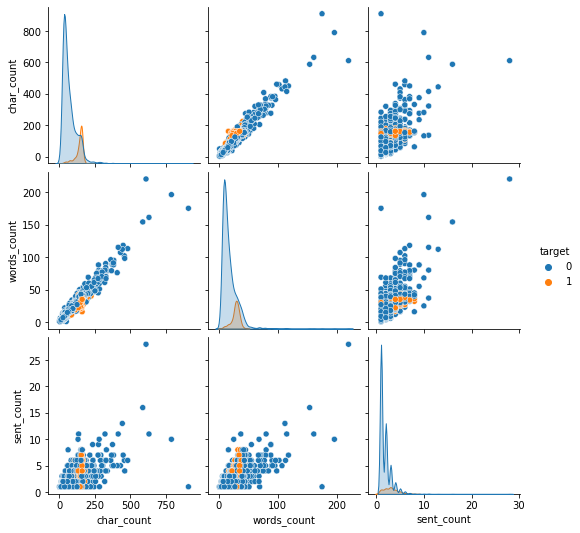

In [26]:
 sns.pairplot(df,hue='target')

<AxesSubplot:>

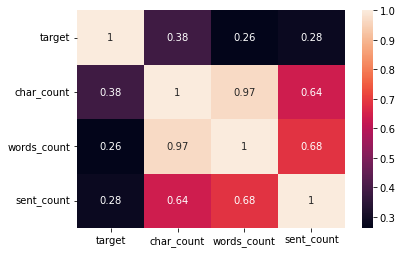

In [27]:
sns.heatmap(df.corr(),annot=True)

## 3. DATA PREPROCESSING

##### * Lower case data
##### * Tokenization
##### * Removing special characters
##### * Removin stop words and punctautions
##### * Stemming



In [28]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
ps=PorterStemmer()
import string
def transform_mails(mails):
    mails=mails.lower()
    mails=nltk.word_tokenize(mails)
    
    y=[]
    for i in mails:
        if i.isalnum():
            y.append(i)
    mails = y[:]
    y.clear()
    
    for i in mails:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    
    mails=y[:]
    y.clear()
    
    for i in mails:
        y.append(ps.stem(i))
    
    return " ".join(y)
    

In [61]:
transform_mails("TypeError: 'TfidfVectorizer' object is not callable
")

SyntaxError: EOL while scanning string literal (47326821.py, line 1)

In [30]:
df['mails'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [31]:
df['transformed_mails']=df['mails'].apply(transform_mails)

In [32]:
df.sample(5)

,target,mails,char_count,words_count,sent_count,transformed_mails
1810,0,"Now, whats your house # again ? And do you hav...",64,16,2,what hous beer
3972,0,"Night night, see you tomorrow",29,6,1,night night see tomorrow
3053,0,What happened to our yo date?,29,7,1,happen yo date
2709,0,Sorry de i went to shop.,24,7,1,sorri de went shop
4222,0,Stupid auto correct on my phone,31,6,1,stupid auto correct phone


In [33]:
#pip install wordcloud

In [34]:
#getting most frequent used words in spam mails
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500, min_font_size=10,background_color='white')

In [35]:
span_wc=wc.generate(df[df['target']==1]['transformed_mails'].str.cat(sep=" ")) 

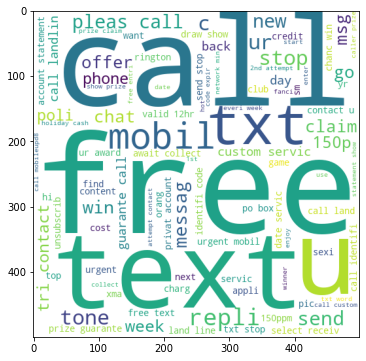

In [36]:
plt.figure(figsize=(15,6))
plt.imshow(span_wc)

In [37]:
ham_wc=wc.generate(df[df['target']==0]['transformed_mails'].str.cat(sep=" "))

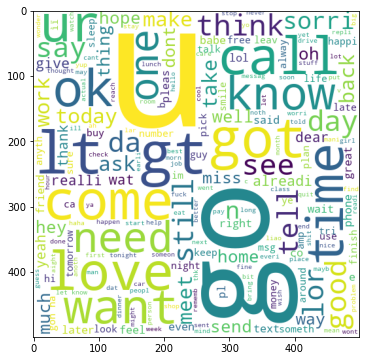

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [39]:
# to get the top 30 most used words in spam mails
spam_corpus=[]
for i in df[df['target']==1]['transformed_mails'].tolist():
    for word in i.split():
        spam_corpus.append(word)

In [40]:
len(spam_corpus)

9939

In [41]:
from collections import Counter
Counter(spam_corpus).most_common(10)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


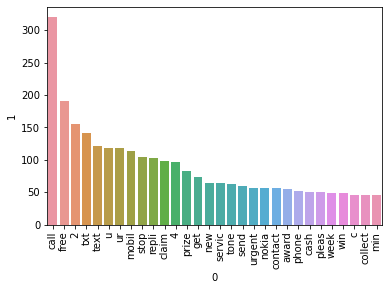

In [42]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
# to get the top 30 most used words in ham mails
ham_corpus=[]
for i in df[df['target']==0]['transformed_mails'].tolist():
    for word in i.split():
        ham_corpus.append(word)

In [44]:
len(ham_corpus)

35394

In [45]:
from collections import Counter
Counter(spam_corpus).most_common(10)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


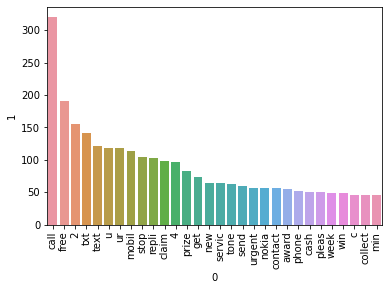

In [46]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. MODEL BUILDING

In [47]:
# we are using naive baiyes classifier

In [62]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [63]:
x=tfidf.fit_transform(df['transformed_mails']).toarray()

In [50]:
x.shape

(5169, 3000)

In [51]:
y=df['target'].values

In [52]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [64]:
gm=GaussianNB()
mm=MultinomialNB()
bm=BernoulliNB()

In [65]:
gm.fit(x_train,y_train)
y_pred1 = gm.predict(x_test)
print(accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)*100)

86.94390715667312
[[788 108]
 [ 27 111]]
50.68493150684932


In [66]:
mm.fit(x_train,y_train)
y_pred2 = mm.predict(x_test)
print(accuracy_score(y_test,y_pred2)*100)
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)*100)

97.09864603481626
[[896   0]
 [ 30 108]]
100.0


In [67]:
bm.fit(x_train,y_train)
y_pred3 = bm.predict(x_test)
print(accuracy_score(y_test,y_pred3)*100)
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3)*100)

98.35589941972921
[[895   1]
 [ 16 122]]
99.1869918699187


In [59]:
# tfidf --> multinomialNB 
#IMPROVEMENT
# max_feature=3000

In [68]:
# To generate the model
import pickle
pickle.dump(tfidf,open('vectorizer.pkl', 'wb'))
pickle.dump(mm,open('model.pkl', 'wb'))